<h1 align='center' style="color: blue;">Big Data Analytics - AmesHousing</h1>

<h3 align='center' style="color: black;">Importing libraries and working with data</h3>

In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

house_df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)


In [76]:
house_df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


<h3 align='center' style="color: black;"> Data Preprocessing </h3>

In [77]:
house_df['Central Air'] = house_df['Central Air'].map({'Y': 1, 'N':0})

In [78]:
house_df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [79]:
house_df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [80]:
house_df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='Count'>

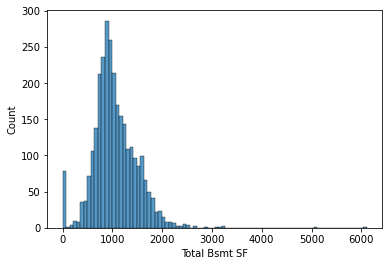

In [81]:
sns.histplot(house_df['Total Bsmt SF'])

In [82]:
house_df.shape

(2930, 6)

In [83]:
# applying mean for Total Bsmt SF

Bsmt_mean = house_df['Total Bsmt SF'].dropna().mean()
house_df['Total Bsmt SF'] = house_df['Total Bsmt SF'].fillna(Bsmt_mean)


In [84]:
house_df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [85]:
house_df.isna().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [86]:
# checking for duplicates

print(' Number of duplicates in the original dataset:', house_df.duplicated().sum())

 Number of duplicates in the original dataset: 10


In [87]:
new_house_df = house_df.drop_duplicates()

In [88]:
print(' Number of duplicates in the original dataset:', new_house_df.duplicated().sum())

 Number of duplicates in the original dataset: 0


In [89]:
new_house_df.shape

(2920, 6)

In [90]:
new_house_df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


<h3 align='center' style="color: black;">Exploratory Analysis</h3>

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

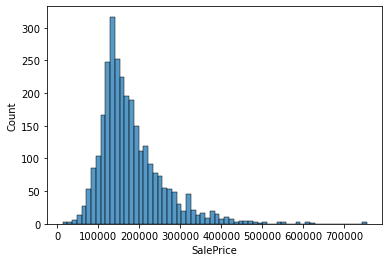

In [91]:
sns.histplot(x=new_house_df['SalePrice'], data=new_house_df)

/Users/ammu/Desktop/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


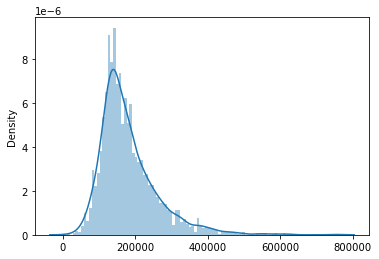

In [92]:
figsize = (15,11)
sns.distplot(x=new_house_df['SalePrice'], bins=100)
plt.show()

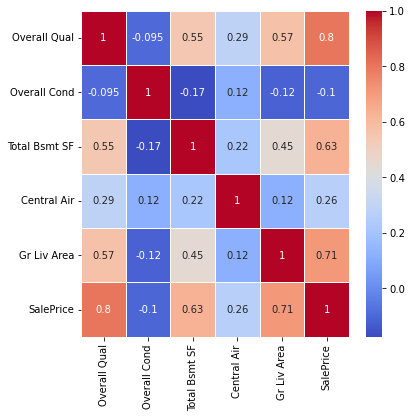

In [93]:
plt.figure(figsize = (6,6))
sns.heatmap(new_house_df.corr(), annot=True, cmap='coolwarm',linewidths = .6)
plt.show()

<h3 align='center' style="color: black;">Specifying X (predictor) and y (target) variables</h3>

In [94]:
X = new_house_df.drop(columns=['SalePrice'], axis=1)

In [95]:
X.columns

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area'],
      dtype='object')

In [96]:
y = new_house_df['SalePrice']

In [97]:
X.shape

(2920, 5)

In [98]:
y.shape

(2920,)

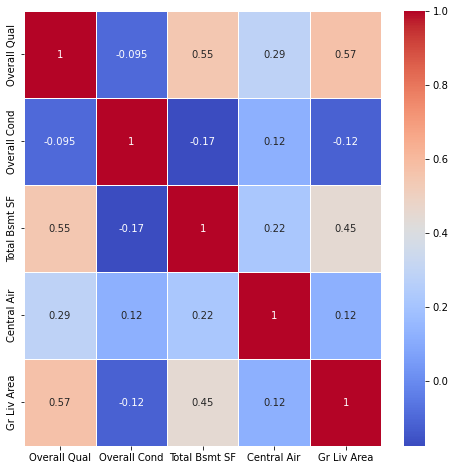

In [99]:
plt.figure(figsize = (8,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm',linewidths = .6)
plt.show()

### Scaling the data using MinMaxScaler()

In [101]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
scaler = MinMaxScaler()

In [102]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [103]:
len(X_train),len(X_test), len(y_train), len(y_test)

(2044, 876, 2044, 876)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2044, 5), (876, 5), (2044,), (876,))

In [105]:
#scale our data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
#now scale xtest using the same scaler
X_test_scaled = scaler.transform(X_test)

<h3 align='center' style="color: black;">Training the model</h3>

### 1. Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_test_hat = linear_model.predict(X_test_scaled)

In [107]:
print("Training R-Squared: ", linear_model.score(X_train_scaled, y_train))
print("Test R-Squared: ", linear_model.score(X_test_scaled, y_test))

Training R-Squared:  0.7498716215218659
Test R-Squared:  0.7972072352993547


In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_test_hat)
MSE = mean_squared_error(y_test,y_test_hat)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 25465.883400166458
MSE = 1318944344.0124044
RMSE = 36317.273355972146


### 2. Lasso

In [109]:
#use your regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#model = LinearRegression()
lasso_model = Lasso(alpha = 0.05)
#learn the training set
lasso_model.fit(X_train_scaled, y_train)
y_predicted = lasso_model.predict(X_test_scaled)

In [110]:
print("Training R-Squared: ", lasso_model.score(X_train_scaled, y_train))
print("Test R-Squared: ", lasso_model.score(X_test_scaled, y_predicted))

Training R-Squared:  0.7498716213887408
Test R-Squared:  1.0


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
RMSE = np.sqrt(MSE)
print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))


MAE = 25465.92196056621
MSE = 1318952427.040507
RMSE = 36317.38463932263


### 3. Ridge

In [112]:
#use your regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#model = LinearRegression()
ridge_model = Ridge(alpha = 0.05)
#learn the training set
ridge_model.fit(X_train_scaled, y_train)
y_predicted = ridge_model.predict(X_test_scaled)

In [113]:
print("Training R-Squared: ", ridge_model.score(X_train_scaled, y_train))
print("Test R-Squared: ", ridge_model.score(X_test_scaled, y_predicted))

Training R-Squared:  0.7498704632197066
Test R-Squared:  1.0


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
RMSE = np.sqrt(MSE)
print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 25468.454004579893
MSE = 1319897236.2551103
RMSE = 36330.389982150075


### 4. Random Forest regressor with scaled data using MinMaxScaler()

In [115]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(X_train_scaled, y_train)  

y_predicted = regressor.predict(X_test_scaled)

In [116]:
print("Training R-Squared: ", regressor.score(X_train_scaled, y_train))
print("Test R-Squared: ", regressor.score(X_test_scaled, y_test))

Training R-Squared:  0.9743682527814783
Test R-Squared:  0.854652467837098


In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 21398.629691518716
MSE = 945326159.6655501
RMSE = 30746.15682757034


### 5. Random Forest regressor with original data

In [118]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

y_predicted = regressor.predict(X_test)

In [119]:
print("Training R-Squared: ", regressor.score(X_train, y_train))
print("Test R-Squared: ", regressor.score(X_test, y_test))

Training R-Squared:  0.9743678664414066
Test R-Squared:  0.8545172441651083


In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 21421.701243894233
MSE = 946205641.2269892
RMSE = 30760.45580330352


### Scaling the data using StandardScalar()

In [121]:
scale_house_df = new_house_df

In [122]:
scale_house_df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [123]:
X.shape, y.shape

((2920, 5), (2920,))

In [124]:
from sklearn.model_selection import train_test_split
  
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size = 0.3, random_state=1)

In [126]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scalar = scaler.fit_transform(X1_train)
X_test_scalar = scaler.transform(X1_test)

### 6. Random Forest regressor with scaled data using StandardScaler()

In [127]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
  
# fit the regressor with x and y data
regressor.fit(X_train_scalar, y1_train)  

y_predicted_RF = regressor.predict(X_test_scalar)

In [128]:
print("Training R-Squared: ", regressor.score(X_train_scalar, y1_train))
print("Test R-Squared: ", regressor.score(X_test_scalar, y1_test))

Training R-Squared:  0.9770319953039585
Test R-Squared:  0.7958397241996271


In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y1_test,y_predicted_RF)
MSE = mean_squared_error(y1_test,y_predicted_RF)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 21593.015465791403
MSE = 1161737522.915673
RMSE = 34084.27090192297


<h3 align='center' style="color: black;">Conclusion</h3>

In [130]:
details = {
    'Model' : ['Linear Regression (MinMaxScalar) %' , 
               'Lasso (MinMaxScalar) %', 
               'Ridge (MinMaxScalar) %',
               'Random Forest (MinMaxScalar) %',
               'Random Forest (Orig) %',
               'Random Forest (StandardScalar) %',],
    'Train_R^2' : [74.98, 74.98, 74.98, 97.43, 97.43, 97.70],
    'Test_R^2' : [79.72, 100, 99.99, 85.46, 85.45, 79.58],
    'MAE' : [25465.88, 25465.92, 25468.45, 21398.62, 21421.70, 21593.01],
    'MSE' : [1318944344.01, 1318952427.04, 1319897237.25, 945326159.66, 946205641.22, 1161737522.91],
    'RMSE' :[36317.27, 36317.38, 36330.38, 30746.15, 30760.45, 34084.27],
}
  
# creating a Dataframe object 
df = pd.DataFrame(details)
  
df

,Model,Train_R^2,Test_R^2,MAE,MSE,RMSE
0,Linear Regression (MinMaxScalar) %,74.98,79.72,25465.88,1.318944e+09,36317.27
1,Lasso (MinMaxScalar) %,74.98,100.00,25465.92,1.318952e+09,36317.38
2,Ridge (MinMaxScalar) %,74.98,99.99,25468.45,1.319897e+09,36330.38
3,Random Forest (MinMaxScalar) %,97.43,85.46,21398.62,9.453262e+08,30746.15
4,Random Forest (Orig) %,97.43,85.45,21421.70,9.462056e+08,30760.45
5,Random Forest (StandardScalar) %,97.70,79.58,21593.01,1.161738e+09,34084.27


Random Forest with scaled data using MinMaxScalar() is performing well with r_square(train) as 97.43%, r_square(test) as 85.46% and with RMSE as 30746.15 